# Курс орнитологии

1. Реализуйте модель для извлечения признаков из голоса птиц. За основу можно брать:
   - преобразование в аудиофичи (например как mfcc в лекции. Конкретно это преобразование использовать нельзя)
   - обученные поверх аудиофич ML модели
  
1. С помощью модели и одного из предложенных датасетов создайте эмбеддинги пения птиц. Создайте эмбеддинги нескольких записей каждого вида птиц. Визуализируйте эмбеддинги. Для визуализации рекомендуется использовать подмножество видов птиц

1. Аргументируйте почему ваша модель хорошо извлекает признаки из аудио. 
    - Покажите кластеризацию эмбеддингов по видам

1. С помощью эмбеддингов найдите похожие по звучанию виды птиц. Выведите примеры их пения в ноутбуке.



Датасеты:
1. [Датасет](https://www.kaggle.com/vinayshanbhag/bird-song-data-set) американских птиц
1. Почищенный от фонового шума BirdCall [датасет](https://www.kaggle.com/luisblanche/birdcall-singing-3)
1. [Датасет](https://www.kaggle.com/luisblanche/birdcall-singing-0) BirdCall часть 1

In [54]:
import librosa
import librosa.display as librosa_display
import soundfile as sf
import numpy as np
import pandas as pd
from scipy.spatial import distance
import matplotlib.pyplot as plt
from copy import copy

import IPython

In [55]:
import opendatasets as od
od.download("https://www.kaggle.com/vinayshanbhag/bird-song-data-set")

Skipping, found downloaded files in "./bird-song-data-set" (use force=True to force download)


In [56]:
df = pd.read_csv('bird-song-data-set/bird_songs_metadata.csv')
df.head(10)

,id,genus,species,subspecies,name,recordist,country,location,latitude,longitude,altitude,sound_type,source_url,license,time,date,remarks,filename
0,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-0.wav
1,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-1.wav
2,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-4.wav
3,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-5.wav
4,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-6.wav
5,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-8.wav
6,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-9.wav
7,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-11.wav
8,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-14.wav
9,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-15.wav


In [57]:
df = df[['species', 'filename']]
df.head()

,species,filename
0,bewickii,557838-0.wav
1,bewickii,557838-1.wav
2,bewickii,557838-4.wav
3,bewickii,557838-5.wav
4,bewickii,557838-6.wav


In [58]:
import torch
speechs = []
for file in list(df['filename']):
    wave, _ = librosa.load('bird-song-data-set/wavfiles/' + file)
    speechs.append(torch.Tensor(wave))

In [59]:
# сделаем эмбеддинги

def make_embs(audio: torch.Tensor) -> torch.Tensor:
    res = librosa.feature.rms(audio.numpy())
    return torch.from_numpy(res)[0]

embs = [make_embs(audio) for audio in speechs]

print([t.size() for t in embs])

[torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size([130]), torch.Size(

In [60]:
colors = []
for i in list(df['species']):
    if (i == 'melodia'):
        colors.append('green')
    elif (i == 'polyglottos'):
        colors.append('blue')
    elif (i == 'cardinalis'):
        colors.append('purple')
    elif (i == 'migratorius'):
        colors.append('red')
    else:
        colors.append('yellow')

In [61]:
import umap.umap_ as umap

X = umap.UMAP(n_neighbors = 15, min_dist = 0.2, random_state = 42).fit_transform(torch.stack(embs))

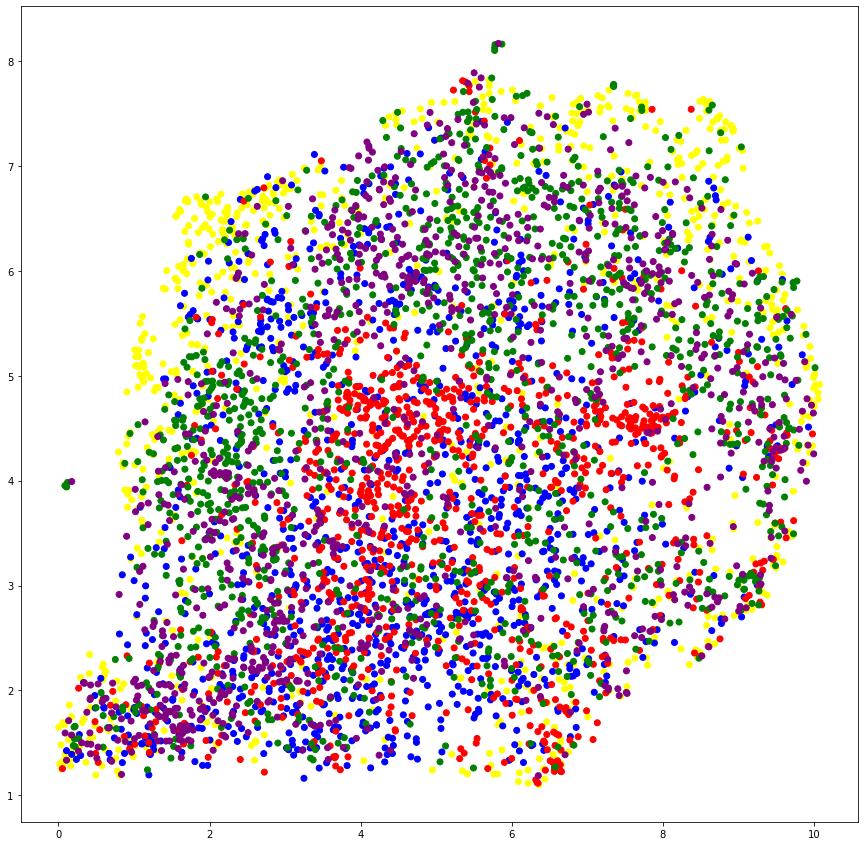

In [62]:
plt.rcParams['figure.figsize'] = (15, 15)
plt.scatter(X[:, 0], X[:, 1], color = colors)
plt.show()

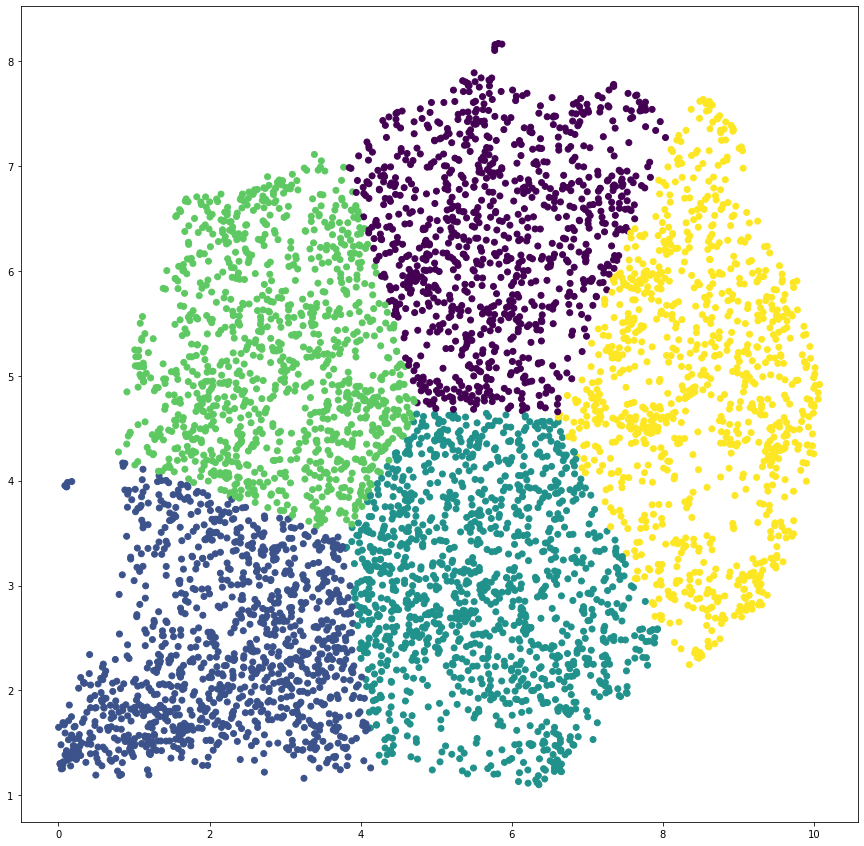

In [63]:
from sklearn.cluster import KMeans

y_kmeans = KMeans(n_clusters=5).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c = y_kmeans)

In [64]:
def F0():
    sum = 0
    cnt = 0
    ans = 0
    for i in range (len(y_kmeans)):
        for j in range (i):
            if y_kmeans[i] == y_kmeans[j]:
                sum += distance.euclidean(X[i], X[j])
                cnt += 1
    return sum / cnt
def F1():
    sum = 0
    cnt = 0
    ans = 0
    for i in range (len(y_kmeans)):
        for j in range (i):
            if y_kmeans[i] != y_kmeans[j]:
                sum += distance.euclidean(X[i], X[j])
                cnt += 1
    return sum / cnt

In [65]:
f0 = F0()
f1 = F1()

In [66]:
print(f'F0: {f0}, F1: {f1}, F0/F1: {f0/f1}')

F0: 1.6885828376634116, F1: 4.251883296444293, F0/F1: 0.3971376258317147


In [67]:
df.head()

,species,filename
0,bewickii,557838-0.wav
1,bewickii,557838-1.wav
2,bewickii,557838-4.wav
3,bewickii,557838-5.wav
4,bewickii,557838-6.wav


In [68]:
import IPython

file = '557838-0.wav'

IPython.display.Audio('bird-song-data-set/wavfiles/557838-0.wav')

In [69]:
from scipy.spatial import distance

similarity = copy(df)

wave, _ = librosa.load('bird-song-data-set/wavfiles/' + file)
vec = make_embs(torch.Tensor(wave)).numpy()

def get_dist(f):
    wave_i, _ = librosa.load('bird-song-data-set/wavfiles/' + f)
    cur_vec = make_embs(torch.Tensor(wave_i)).numpy()
    return distance.cosine(vec, cur_vec)
    
similarity['dist'] = similarity['filename'].apply(get_dist)

In [70]:
similarity.sort_values(by = ['dist']).head()

,species,filename,dist
0,bewickii,557838-0.wav,0.000000
10,bewickii,557838-17.wav,0.004313
5248,cardinalis,125284-1.wav,0.019451
673,bewickii,178015-12.wav,0.028615
4767,cardinalis,373569-6.wav,0.029786


In [72]:
IPython.display.Audio('bird-song-data-set/wavfiles/557838-17.wav')